# Wine Tasting Dataset (Kaggle - Maven Analytics)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
# Importing dataset to do some EDA:
wines = pd.read_csv("dataset_wine_enthusiast.csv")

In [3]:
# Dropping NaN values from columns "country", "price" and "variety":
wines_cleaned = wines.dropna(subset=["country", "price", "variety"])

In [4]:
# Renaming column "price" to "price_usd":
wines_cleaned.rename(columns={"price":"price_usd"}, inplace=True)

In [5]:
# Dropping columns "id" and "designation":
wines_cleaned = wines_cleaned.drop(columns=["id", "designation"])

In [6]:
# Calculating weights of countries:
weights_country = wines_cleaned["country"].value_counts() / len(wines_cleaned["country"])*100

# Defining a threshold (1%):
threshold_country = 1

# Dropping rows where "country" has a weight below the previous threshold (1%):
# aka
# Keeping rows where "country" has a weight above the previous threshold (1%):
wines_cleaned = wines_cleaned[wines_cleaned["country"].map(weights_country) >= threshold_country]

In [7]:
# Standardizing wine varieties: 
variety_dict = {
    "Alvarinho":"Albariño",
    "Bonarda":"Bonarda Piemontese", 
    "Cabernet Sauvignon-Carmenère":"Cabernet Sauvignon-Carménère", "Carmenère-Cabernet Sauvignon":"Cabernet Sauvignon-Carménère",
    "Malbec-Cabernet Sauvignon":"Cabernet Sauvignon-Malbec",
    "Merlot-Cabernet Sauvignon":"Cabernet Sauvignon-Merlot",
    "Cabernet Sauvignon-Shiraz":"Cabernet Sauvignon-Syrah", "Cabernet-Syrah":"Cabernet Sauvignon-Syrah", "Shiraz-Cabernet Sauvignon":"Cabernet Sauvignon-Syrah",
    "Syrah-Cabernet":"Cabernet Sauvignon-Syrah", "Syrah-Cabernet Sauvignon":"Cabernet Sauvignon-Syrah",
    "Tempranillo-Cabernet Sauvignon":"Cabernet Sauvignon-Tempranillo",
    "Carignan":"Carignan/Mazuelo", "Carignane":"Carignan/Mazuelo", "Carignano":"Carignan/Mazuelo", "Mazuelo":"Carignan/Mazuelo",
    "Carmenère":"Carménère",
    "Friulano":"Sauvignonasse/Friulano",
    "Alicante Bouschet":"Alicante Bouschet/Garnacha Tintorera",
    "Greco":"Grechetto",
    "Glera":"Glera/Prosecco", "Prosecco":"Glera/Prosecco",
    "Garnacha":"Grenache",
    "Garnacha Blanca":"Grenache Blanc",
    "Melon":"Melon De Bourgogne",
    "Monastrell":"Mourvèdre/Monastrell","Mourvèdre":"Mourvèdre/Monastrell",
    "Moscato":"Muscat Blanc à Petits Grains", "Moscato Giallo":"Muscat Blanc à Petits Grains", "Muscat":"Muscat Blanc à Petits Grains", "Muscat Blanc":"Muscat Blanc à Petits Grains",
    "Insolia":"Muscat of Alexandria", "Inzolia":"Muscat of Alexandria", "Moscatel":"Muscat of Alexandria", "Moscatel de Alejandría":"Muscat of Alexandria", "Muscat d'Alexandrie":"Muscat of Alexandria",
    "Muskat":"Muscat of Alexandria", "Zibibbo":"Muscat of Alexandria",
    "Nero d'Avola":"Nero D'Avola",
    "Gros and Petit Manseng":"Petit Manseng",
    "Durif":"Petite Sirah/Durif", "Petite Sirah":"Petite Sirah/Durif",
    "Pinot Bianco":"Pinot Blanc", "Weissburgunder":"Pinot Blanc",
    "Pinot Grigio":"Pinot Gris",
    "Pinot Nero":"Pinot Noir", "Spätburgunder":"Pinot Noir",
    "Austrian Red Blend":"Red Blend", "Bordeaux-style Red Blend":"Cabernet Sauvignon-Merlot-Other Bordeaux", "Cabernet Blend":"Red Blend", "Corvina, Rondinella, Molinara":"Red Blend", "G-S-M":"Grenache-Syrah-Mourvèdre/Monastrell",
    "Meritage":"Red Blend", "Portuguese Red":"Red Blend", "Provence red blend":"Red Blend", "Rhône-style Red Blend":"Grenache-Syrah-Mourvèdre/Monastrell",
    "Rosado":"Rosé", "Rosato":"Rosé",
    "Prugnolo Gentile":"Sangiovese", "Sangiovese Grosso":"Sangiovese",
    "Fumé Blanc":"Sauvignon Blanc", "Sauvignon":"Sauvignon Blanc",
    "Sauvignon Blanc-Semillon":"Sauvignon Blanc-Sémillon", "Semillon-Sauvignon Blanc":"Sauvignon Blanc-Sémillon",
    "Portuguese Sparkling":"Sparkling Blend",
    "Sylvaner":"Silvaner",
    "Shiraz":"Syrah",
    "Garnacha-Syrah":"Syrah-Grenache", "Grenache-Syrah":"Syrah-Grenache",
    "Tempranillo Blend":"Tempranillo",
    "Tinta de Toro":"Tinta De Toro",
    "Ugni Blanc":"Trebbiano",
    "Macabeo":"Viura/Macabeo", "Viura":"Viura/Macabeo",
    "Alsace white blend":"White Blend", "Austrian white blend":"White Blend", "Bordeaux-style White Blend":"Sauvignon Blanc-Sémillon-Other Bordeaux", "Champagne Blend":"Pinot Noir-Chardonnay-Pinot Meunier",
    "Portuguese White":"White Blend", "Provence white blend":"White Blend", "Rhône-style White Blend":"Marsanne-Roussane-Viognier",
    "Primitivo":"Zinfandel"
}

wines_cleaned["variety"] = wines_cleaned["variety"].replace(variety_dict)

In [8]:
# Keeping rows with count of wine varieties over 40 units:
threshold_variety = 40

variety_counts = wines_cleaned["variety"].map(wines_cleaned["variety"].value_counts())

wines_cleaned = wines_cleaned[variety_counts > threshold_variety]

In [9]:
# Reseting index:
wines_cleaned.reset_index(inplace=True, drop=True)

In [ ]:
# Filling NaN values in column "taster_twitter_handle", according to column "taster_name":
taster_dict = {
    "Anna Lee C. Iijima":"@annaleeiijima",     # Instagram
    "Alexander Peartree":"@apatrone23",     # Instagram
    "Carrie Dykes":"@carriedykes1"
}

wines_cleaned["taster_twitter_handle"] = wines_cleaned["taster_twitter_handle"].fillna(wines_cleaned["taster_name"].map(taster_dict))

# Filling remaining NaN values in both columns "taster_name" and "taster_twitter_handle":
wines_cleaned["taster_name"] = wines_cleaned["taster_name"].fillna("Unknown")
wines_cleaned["taster_twitter_handle"] = wines_cleaned["taster_twitter_handle"].fillna("@Unknown_Wine_Taster")

In [11]:
# Renaming country "US" for "United States":
wines_cleaned["country"] = wines_cleaned["country"].replace("US", "United States")

In [12]:
# Replacing values of columns "province - Other" and "country - Argentina" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"]=="Argentina") & (wines_cleaned["province"]=="Other"), "province"] = wines_cleaned["region_1"]

In [13]:
# Replacing values of columns "province" and "country - Italy" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"]=="Italy"), "province"] = wines_cleaned["region_1"]

In [14]:
# Replacing values of columns "province" and "country - Spain" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"]=="Spain"), "province"] = wines_cleaned["region_1"]

In [15]:
# Standardizing wine-regions for FRANCE:
repregfra_dict = {"Burgundy":"Bourgogne",
                  "Rhône Valley":"Vallée du Rhône",
                  "Loire Valley":"Val de Loire",
                  "Southwest France":"Sud-Ouest",
                  "France Other":"France"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregfra_dict)

In [16]:
# Standardizing wine-regions for PORTUGAL:
repregprt_dict = {"Alentejano":"Alentejo",
                  "Alenteo":"Alentejo",
                  "Duriense":"Douro",
                  "Moscatel do Douro":"Douro",
                  "Setubal":"Península de Setúbal",
                  "Moscatel de Setúbal":"Península de Setúbal",
                  "Terras do Sado":"Península de Setúbal",
                  "Palmela":"Península de Setúbal",
                  "Minho":"Vinho Verde",
                  "Port":"Douro",
                  "Ribatejano":"Tejo",
                  "Ribatejo":"Tejo",
                  "Beira Atlantico":"Bairrada",
                  "Terras do Dão":"Dão",
                  "Alenquer":"Lisboa",
                  "Bucelas":"Lisboa",
                  "Obidos":"Lisboa",
                  "Estremadura":"Lisboa",
                  "Beiras":"Portugal",
                  "Vinho Espumante":"Portugal",
                  "Portuguese Table Wine":"Portugal",
                  "Table wine":"Portugal",
                  "Vinho Espumante de Qualidade":"Portugal",
                  "Vinho da Mesa":"Portugal",
                  "Vinho Licoroso":"Portugal",
                  
                  "Algarve":"Portugal",
                  "Beira Interior":"Portugal",
                  "Madeira":"Portugal",
                  "Távora-Varosa":"Portugal",
                  "Trás-os-Montes":"Portugal"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregprt_dict)

In [17]:
# Standardizing wine-regions for GERMANY:
repregdeu_dict = {"Mosel":"Mosel-Saar-Ruwer",
                  "Landwein Rhein":"Germany",
                  
                  "Ahr":"Germany",
                  "Franken":"Germany",
                  "Mittelrhein":"Germany",
                  "Württemberg":"Germany"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregdeu_dict)

In [18]:
# Standardizing wine:regions for SOUTH AFRICA:
repregzaf_dict = {"Eilandia":"Breede River Valley",
                  "Breedekloof":"Breede River Valley",
                  "Robertson":"Breede River Valley",
                  "Bot River":"Cape South Coast",
                  "Cape Agulhas":"Cape South Coast",
                  "Elgin":"Cape South Coast" ,
                  "Elim":"Cape South Coast",
                  "Hemel en Aarde":"Cape South Coast",
                  "Overberg":"Cape South Coast",
                  "Walker Bay":"Cape South Coast",
                  "Darling":"Coastal Region",
                  "Constantia":"Coastal Region",
                  "Franschhoek":"Coastal Region",
                  "Groenekloof":"Coastal Region",
                  "Jonkershoek Valley":"Coastal Region",
                  "Tulbagh":"Coastal Region",
                  "Vlootenburg":"Coastal Region",
                  "Paardeberg":"Coastal Region",
                  "Helderberg":"Coastal Region",
                  "Cape Peninsula":"Coastal Region",
                  "Devon Valley":"Coastal Region",
                  "Stellenbosch":"Coastal Region",
                  "Simonsberg-Stellenbosch":"Coastal Region",
                  "Paarl":"Coastal Region",
                  "Simonsberg-Paarl":"Coastal Region",
                  "Wellington":"Coastal Region",
                  "Swartland":"Coastal Region",
                  "Durbanville":"Coastal Region",
                  "Philadelphia":"Coastal Region",
                  "Lutzville Valley":"South Africa",     # Olifants River
                  "Cederberg":"South Africa",     # Olifants River
                  
                  "Northern Cape":"South Africa",
                  "Olifants River":"South Africa"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregzaf_dict)

In [19]:
# Standardizing wine:regions for CHILE:
repregchl_dict = {"Elqui Valley":"Coquimbo",
                  "Limarí Valley":"Coquimbo",
                  "Choapa Valley":"Coquimbo",
                  "Aconcagua Valley":"Aconcagua",
                  "Aconcagua Costa":"Aconcagua",
                  "Casablanca Valley":"Aconcagua",
                  "Casablanca & Leyda Valleys":"Aconcagua",
                  "Casablanca-Curicó Valley":"Aconcagua",
                  "San Antonio":"Aconcagua",
                  "Colchagua Costa":"Valle Central",
                  "Colchagua Valley":"Valle Central",
                  "Cachapoal Valley":"Valle Central",
                  "Curicó and Leyda Valleys":"Valle Central",
                  "Curicó and Maipo Valleys":"Valle Central",
                  "Curicó Valley":"Valle Central",
                  "Leyda Valley-Maipo Valley":"Valle Central",
                  "Leyda Valley":"Valle Central",
                  "Maipo Valley-Colchagua Valley":"Valle Central",
                  "Maipo Valley":"Valle Central",
                  "Maule Valley":"Valle Central",
                  "Rapel Valley":"Valle Central",
                  "Loncomilla Valley":"Valle Central",
                  "Lontué Valley":"Valle Central",
                  "Rio Claro":"Valle Central",
                  "Peumo":"Valle Central",
                  "Marchigue":"Valle Central",
                  "Puente Alto":"Valle Central",
                  "Santa Cruz":"Valle Central",
                  "Lolol Valley":"Valle Central",
                  "Cauquenes Valley":"Valle Central",
                  "Apalta":"Valle Central",
                  "Sagrada Familia":"Valle Central",
                  "San Clemente":"Valle Central",
                  "Buin":"Valle Central",
                  "Pirque":"Valle Central",
                  "Molina":"Valle Central",
                  "Requinoa":"Valle Central",
                  "Itata Valley":"Chile Sur",
                  "Bío Bío Valley":"Chile Sur",
                  "Malleco":"Southern Chile",

                  "Southern Chile":"Chile Sur",
                  "Central Valley":"Valle Central"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregchl_dict)

In [20]:
# Standardizing wine-regions for AUSTRALIA:
repregaus_dict = {"Australia Other":"Australia"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregaus_dict)

In [21]:
# Standardizing wine-regions for NEW ZEALAND:
repregnzl_dict = {"Kumeu":"New Zealand",     # Auckland
                  "Martinborough":"Wairarapa",
                  "Gladstone":"Wairarapa",
                  "Canterbury":"North Canterbury",
                  "Waipara Valley":"North Canterbury",
                  "Waipara":"North Canterbury",
                  "Awatere Valley":"Marlborough",
                  "Wairau Valley":"Marlborough",
                  "East Coast":"New Zealand",
                  "South Island":"New Zealand",
                  
                  "Auckland":"New Zealand",
                  "Gisborne":"New Zealand",
                  "Nelson":"New Zealand",
                  "Waiheke Island":"New Zealand",
                  "Waitaki Valley":"New Zealand"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregnzl_dict)

In [22]:
# Standardizing wine-regions for ARGENTINA:
repregarg_dict = {"Mendoza Province":"Mendoza",
                  "Neuquén":"Patagonia",
                  "Río Negro Valley":"Patagonia",
                  "Alto Valle del Río Negro":"Patagonia",
                  "Cafayate":"Salta",
                  "Calchaquí Valley":"Salta",
                  "Famatina Valley":"Argentina",     # La Rioja
                  "Tulum Valley":"San Juan",
                  "Zonda Valley":"San Juan",
                  "Pedernal Valley":"San Juan",
                  
                  "Buenos Aires":"Argentina",
                  "Catamarca":"Argentina",
                  "Jujuy":"Argentina",
                  "La Rioja":"Argentina"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregarg_dict)

In [23]:
# Standardizing wine-regions for AUSTRIA:
repregaut_dict = {"Carnuntum":"Niederösterreich",
                  "Kamptal":"Niederösterreich",
                  "Kremstal":"Niederösterreich",
                  "Wagram-Donauland":"Niederösterreich",
                  "Wagram":"Niederösterreich",
                  "Wachau":"Niederösterreich",
                  "Traisental":"Niederösterreich",
                  "Weinviertel":"Niederösterreich",
                  "Thermenregion":"Niederösterreich",
                  "Neusiedlersee":"Burgenland",
                  "Leithaberg":"Burgenland",
                  "Mittelburgenland":"Burgenland",
                  "Eisenberg":"Burgenland",
                  "Südburgenland":"Burgenland",
                  "Südoststeiermark":"Steiermark",
                  "Südsteiermark":"Steiermark",
                  "Wiener Gemischter Satz":"Vienna",
                  "Österreichischer Sekt":"Austria",
                  "Österreichischer Perlwein":"Austria",
                  "Weinland Österreich":"Austria"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregaut_dict)

In [24]:
# Standardizing wine-regions for "SPAIN":
repregesp_dict = {"Catalonia":"Spain",     # Catalunya
                  "Emporadà-Costa Brava":"Spain",     # Empordà
                  "Extremadura":"Spain",     # Ribera del Guadiana
                  "Jerez":"Jerez-Xérès-Sherry",
                  "Madrid":"Spain",     # Vinos de Madrid
                  "Mentrida":"Spain",     # Méntrida
                  "Tierra de Castilla":"Spain",     # Tierra de León
                  "Tierra del Viños de Zamora":"Spain",     # Tierra del Vino de Zamora
                  "Sardon de Duero":"Ribera del Duero",
                  "Vi de la Terra Mallorca":"Spain",
                  "Vi de la Terra Illes Balears":"Spain",
                  "Vino de la Tierra de Castilla y León":"Spain",
                  "Vino de la Tierra de Castilla":"Spain",
                  "Vino de la Tierra Contraviesa Alpujarra":"Spain",
                  "Vino de Mesa":"Spain",
                  "Vino de la Tierra del Bajo Aragón":"Spain",
                  "Vino de la Tierra de Cádiz":"Spain",
                  "Vino de la Tierra de Zamora":"Spain",
                  "Vino de la Tierra de Castelló":"Spain",
                  "Vino da Mesa de Toledo":"Spain",
                  "Vino de la Tierra Ribera del Gállego-Cinco Villas":"Spain",
                  "Vino de la Tierra Altiplano de Sierra Nevada":"Spain",
                  "Vino de Calidad de Valtiendas":"Spain",
                  
                  "Alella":"Spain",
                  "Alicante":"Spain",
                  "Almansa":"Spain",
                  "Arribes del Duero":"Spain",
                  "Bizkaiko Txakolina":"Spain",
                  "Bullas":"Spain",
                  "Calatayud":"Spain",
                  "Catalunya":"Spain",
                  "Cigales":"Spain",
                  "Conca de Barberà":"Spain",
                  "Costers del Segre":"Spain",
                  "Dominio de Valdepusa":"Spain",
                  "Empordà":"Spain",
                  "Finca Élez":"Spain",
                  "Getariako Txakolina":"Spain",
                  "Lanzarote":"Spain",
                  "Málaga":"Spain",
                  "Manchuela":"Spain",
                  "Manzanilla-Sanlúcar de Barrameda":"Spain",
                  "Méntrida":"Spain",
                  "Monterrei":"Spain",
                  "Montilla-Moriles":"Spain",
                  "Pago de Arínzano":"Spain",
                  "Pla de Bages":"Spain",
                  "Ribeira Sacra":"Spain",
                  "Ribeiro":"Spain",
                  "Ribera del Guadiana":"Spain",
                  "Ribera del Júcar":"Spain",
                  "Sierra de Salamanca":"Spain",
                  "Somontano":"Spain",
                  "Tarragona":"Spain",
                  "Terra Alta":"Spain",
                  "Tierra de León":"Spain",
                  "Tierra del Vino de Zamora":"Spain",
                  "Uclés":"Spain",
                  "Utiel-Requena":"Spain",
                  "Valdeorras":"Spain",
                  "Valdepeñas":"Spain",
                  "Valencia":"Spain",
                  "Vinos de Madrid":"Spain",
                  "Yecla":"Spain"}

#0 - Spain (consider dropna!!!!)
wines_cleaned["province"] = wines_cleaned["province"].replace(repregesp_dict)

In [25]:
# Standardizing wine-regions for "ITALY":
repregita_dict = {"Cerasuolo d'Abruzzo":"Abruzzo",
                  "Montepulciano d'Abruzzo Colline Teramane":"Abruzzo",
                  "Montepulciano d'Abruzzo Cerasuolo":"Abruzzo",
                  "Montepulciano d'Abruzzo":"Abruzzo",
                  "Trebbiano d'Abruzzo":"Abruzzo",
                  
                  "Aglianico del Vulture":"Basilicata",
                  
                  "Chianti Classico":"Chianti",
                  "Chianti Colli Aretini":"Chianti",
                  "Chianti Colli Fiorentini":"Chianti",
                  "Chianti Colli Pisani":"Chianti",
                  "Chianti Colli Senesi":"Chianti",
                  "Chianti Montalbano":"Chianti",
                  "Chianti Montespertoli":"Chianti",
                  "Chianti Rufina":"Chianti",
                  "Chianti Superiore":"Chianti",
                  "Alta Valle della Greve":"Chianti",
                  "Barco Reale di Carmignano":"Chianti",
                  "Bolgheri Sassicaia":"Chianti",
                  "Bolgheri Superiore":"Chianti",
                  "Bolgheri":"Chianti",
                  "Brunello di Montalcino":"Chianti",
                  "Carmignano":"Chianti",
                  "Colli della Toscana Centrale":"Chianti",
                  "Colli Etruria Centrale":"Chianti",
                  "Colline Lucchesi":"Chianti",
                  "Cortona":"Chianti",
                  "Costa Toscana":"Chianti",
                  "Maremma Toscana":"Chianti",
                  "Maremma":"Chianti",
                  "Montecarlo":"Chianti",
                  "Montecucco":"Chianti",
                  "Monteregio di Massa Marittima":"Chianti",
                  "Montescudaio":"Chianti",
                  "Morellino di Scansano":"Chianti",
                  "Orcia":"Chianti",
                  "Pomino":"Chianti",
                  "Rosso di Montalcino":"Chianti",
                  "Rosso di Montepulciano":"Chianti",
                  "Rosso di Toscana":"Chianti",
                  "Sant'Antimo":"Chianti",
                  "Sovana":"Chianti",
                  "Val di Cornia Suvereto":"Chianti",
                  "Vernaccia di San Gimignano":"Chianti",
                  "San Gimignano":"Chianti",
                  "Vin Santo del Chianti Classico":"Chianti",
                  "Vin Santo del Chianti Rufina":"Chianti",
                  "Vin Santo del Chianti":"Chianti",
                  "Vin Santo di Carmignano":"Chianti",
                  "Vin Santo di Montepulciano":"Chianti",
                  "Vino Nobile di Montepulciano":"Chianti",
                  "Toscana":"Chianti",
                  "Tuscany":"Chianti",
                  
                  "Colli Orientali del Friuli":"Collio Friulano",
                  "Friuli Aquileia":"Collio Friulano",
                  "Friuli Colli Orientali":"Collio Friulano",
                  "Friuli Grave":"Collio Friulano",
                  "Friuli Isonzo":"Collio Friulano",
                  "Friuli Venezia Giulia":"Collio Friulano",
                  "Grave del Friuli":"Collio Friulano",
                  "Isonzo del Friuli":"Collio Friulano",
                  "Collio":"Collio Friulano",
                  "Friuli":"Collio Friulano",
                  "Rosazzo":"Collio Friulano",
                  
                  "Conegliano Valdobbiadene Prosecco Superiore":"Conegliano-Valdobbiadene",
                  "Prosecco di Valdobbiadene Superiore":"Conegliano-Valdobbiadene",
                  "Prosecco di Valdobbiadene":"Conegliano-Valdobbiadene",
                  "Prosecco Superiore di Cartizze":"Conegliano-Valdobbiadene",
                  "Prosecco di Conegliano e Valdobbiadene":"Conegliano-Valdobbiadene",
                  "Prosecco di Conegliano":"Conegliano-Valdobbiadene",
                  "Prosecco del Veneto":"Conegliano-Valdobbiadene",
                  "Prosecco Treviso":"Conegliano-Valdobbiadene",
                  "Prosecco":"Conegliano-Valdobbiadene",
                  "Colli di Conegliano":"Conegliano-Valdobbiadene",
                  "Valdobbiadene Prosecco Superiore":"Conegliano-Valdobbiadene",
                  "Valdobbiadene Superiore di Cartizze":"Conegliano-Valdobbiadene",
                  
                  "Amarone della Valpolicella Classico":"Valpolicella",
                  "Amarone della Valpolicella Valpantena":"Valpolicella",
                  "Amarone della Valpolicella":"Valpolicella",
                  "Recioto della Valpolicella Classico":"Valpolicella",
                  "Recioto della Valpolicella":"Valpolicella",
                  "Valpolicella Classico Superiore Ripasso":"Valpolicella",
                  "Valpolicella Classico Superiore":"Valpolicella",
                  "Valpolicella Classico":"Valpolicella",
                  "Valpolicella Ripasso Classico":"Valpolicella",
                  "Valpolicella Ripasso Valpantena Superiore":"Valpolicella",
                  "Valpolicella Ripasso Valpantena":"Valpolicella",
                  "Valpolicella Ripasso":"Valpolicella",
                  "Valpolicella Superiore Ripasso":"Valpolicella",
                  "Valpolicella Superiore":"Valpolicella",
                  "Valpolicella Valpantena":"Valpolicella",
                  
                  "Sforzato di Valtellina":"Valtellina",
                  "Valtellina Superiore":"Valtellina",
                  
                  "Frascati Superiore":"Italy",     # Frascati
                  
                  "Terre di Franciacorta":"Franciacorta",
                  
                  "Alto Adige Valle Isarco":"Trentino-Alto Adige",
                  "Alto Adige Terlano":"Trentino-Alto Adige",
                  "Alto Adige":"Trentino-Alto Adige",
                  "Valdadige":"Trentino-Alto Adige",
                  "Trentino Superiore":"Trentino-Alto Adige",
                  "Trentino":"Trentino-Alto Adige",
                  "Trento":"Trentino-Alto Adige",
                  "Mitterberg":"Trentino-Alto Adige",
                  "Vigneti delle Dolomiti":"Trentino-Alto Adige",
                  
                  "Dolcetto di Dogliani Superiore":"Langhe",
                  "Dolcetto di Dogliani":"Langhe",
                  "Dogliani Superiore":"Langhe",
                  "Dogliani":"Langhe",
                  "Alta Langa":"Langhe",
                  "Barbaresco":"Langhe",
                  
                  "Barbera d'Asti Superiore Nizza":"Monferrato",
                  "Barbera d'Asti Superiore":"Monferrato",
                  "Barbera d'Asti":"Monferrato",
                  "Dolcetto d'Asti":"Monferrato",
                  "Moscato d'Asti":"Monferrato",
                  "Asti":"Monferrato",
                  "Barbera del Monferrato Superiore":"Monferrato",
                  "Barbera del Monferrato":"Monferrato",
                  "Cortese di Gavi":"Monferrato",
                  "Gavi di Gavi":"Monferrato",
                  "Gavi":"Monferrato",
                  "Monferrato Bianco":"Monferrato",
                  
                  "Barbera di Piemonte":"Roero",
                  "Barbera d'Alba Superiore":"Roero",
                  "Barbera d'Alba":"Roero",
                  "Dolcetto di Diano d'Alba":"Roero",
                  "Dolcetto d'Alba Superiore":"Roero",
                  "Dolcetto d'Alba":"Roero",
                  "Diano d'Alba":"Roero",
                  "Nebbiolo d'Alba":"Roero",
                  "Roero Arneis":"Roero",
                  
                  "Carema":"Italy",     # Valle d'Aosta
                  
                  "Montefalco Rosso":"Montefalco",
                  "Montefalco Sagrantino":"Montefalco",
                  "Sagrantino di Montefalco":"Montefalco",
                  
                  "Cannonau di Sardegna":"Sardegna",
                  "Carignano del Sulcis":"Sardegna",
                  "Colli del Limbara":"Sardegna",
                  "Isola dei Nuraghi":"Sardegna",
                  "Monica di Sardegna":"Sardegna",
                  "Valli di Porto Pino":"Sardegna",
                  "Vermentino di Gallura":"Sardegna",
                  "Vermentino di Sardegna":"Sardegna",
                  "Alghero":"Sardegna",
                  "Sardinia":"Sardegna",
                  
                  "Cerasuolo di Vittoria Classico":"Sicilia",
                  "Cerasuolo di Vittoria":"Sicilia",
                  "Vittoria":"Sicilia",
                  "Contea di Sclafani":"Sicilia",
                  "Contessa Entellina":"Sicilia",
                  "Delia Nivolelli":"Sicilia",
                  "Malvasia delle Lipari":"Sicilia",
                  "Moscato di Noto":"Sicilia",
                  "Passito di Noto":"Sicilia",
                  "Noto":"Sicilia",
                  "Passito di Pantelleria":"Sicilia",
                  "Terre Siciliane":"Sicilia",
                  "Alcamo":"Sicilia",
                  "Eloro":"Sicilia",
                  "Erice":"Sicilia",
                  "Etna":"Sicilia",
                  "Faro":"Sicilia",
                  "Mamertino":"Sicilia",
                  "Marsala":"Sicilia",
                  "Menfi":"Sicilia",
                  "Monreale":"Sicilia",
                  "Salina":"Sicilia",
                  "Siracusa":"Sicilia",
                  
                  "Brachetto d'Acqui":"Italy",
                  "Colli Tortonesi":"Italy",
                  "Colline Novaresi":"Italy",
                  "Coste della Sesia":"Italy",
                  "Dolcetto d'Acqui":"Italy",
                  "Aglianico del Beneventano":"Italy",
                  "Aglianico del Taburno":"Italy",
                  "Aglianico d'Irpinia":"Italy",
                  "Asolo Prosecco Superiore":"Italy",
                  "Bardolino Chiaretto":"Italy",
                  "Bardolino Classico Superiore":"Italy",
                  "Bardolino Classico":"Italy",
                  "Bardolino Superiore":"Italy",
                  "Bardolino":"Italy",
                  "Benaco Bresciano":"Italy",
                  "Beneventano":"Italy",
                  "Bianco di Custoza":"Italy",
                  "Biferno Rosso":"Italy",
                  "Brindisi":"Italy",
                  "Cacc’e Mmitte di Lucera":"Italy",
                  "Calabria":"Italy",
                  "Campania":"Italy",
                  "Campi Flegrei":"Italy",
                  "Castel del Monte":"Italy",
                  "Cesanese del Piglio":"Italy",
                  "Cilento":"Italy",
                  "Circeo":"Italy",
                  "Cirò":"Italy",
                  "Civitella d'Agliano":"Italy",
                  "Colli Aprutini":"Italy",
                  "Colli Bolognesi":"Italy",
                  "Colli di Faenza":"Italy",
                  "Colli di Luni":"Italy",
                  "Colli di Salerno":"Italy",
                  "Colli Euganei":"Italy",
                  "Colli Martani":"Italy",
                  "Colli Perugini":"Italy",
                  "Colli Piacentini":"Italy",
                  "Colli Trevigiani":"Italy",
                  "Colline Pescaresi":"Italy",
                  "Colline Teatine":"Italy",
                  "Colline Teramane":"Italy",
                  "Conero":"Italy",
                  "Controguerra":"Italy",
                  "Copertino":"Italy",
                  "Costa d'Amalfi":"Italy",
                  "Curtefranca":"Italy",
                  "Custoza Superiore":"Italy",
                  "Custoza":"Italy",
                  "Delle Venezie":"Italy",
                  "Emilia-Romagna":"Italy",
                  "Emilia":"Italy",
                  "Epomeo":"Italy",
                  "Est! Est!! Est!!! di Montefiascone":"Italy",
                  "Falanghina del Beneventano":"Italy",
                  "Falanghina del Molise":"Italy",
                  "Falanghina del Sannio":"Italy",
                  "Falerio dei Colli Ascolani":"Italy",
                  "Falerio":"Italy",
                  "Falerno del Massico":"Italy",
                  "Fiano di Avellino":"Italy",
                  "Forlì":"Italy",
                  "Galatina":"Italy",
                  "Galluccio":"Italy",
                  "Gambellara Classico":"Italy",
                  "Garda Classico":"Italy",
                  "Garda":"Italy",
                  "Gioia del Colle":"Italy",
                  "Greco di Tufo":"Italy",
                  "Gutturnio Colli Piacentini":"Italy",
                  "Irpinia":"Italy",
                  "Ischia":"Italy",
                  "Lacryma Christi del Vesuvio":"Italy",
                  "Lago di Corbara":"Italy",
                  "Lambrusco dell'Emilia":"Italy",
                  "Lambrusco di Modena":"Italy",
                  "Lambrusco di Sorbara":"Italy",
                  "Lambrusco Grasparossa di Castelvetro":"Italy",
                  "Lambrusco Reggiano":"Italy",
                  "Lamezia":"Italy",
                  "Lazio":"Italy",
                  "Lessini Durello":"Italy",
                  "Lison-Pramaggiore":"Italy",
                  "Lombardy":"Italy",
                  "Lugana Superiore":"Italy",
                  "Lugana":"Italy",
                  "Marca Trevigiana":"Italy",
                  "Marche":"Italy",
                  "Martina":"Italy",
                  "Molise":"Italy",
                  "Montello e Colli Asolani":"Italy",
                  "Montenetto di Brescia":"Italy",
                  "Murgia":"Italy",
                  "Offida Pecorino":"Italy",
                  "Offida Rosso":"Italy",
                  "Orvieto Classico Superiore":"Italy",
                  "Orvieto Classico":"Italy",
                  "Orvieto":"Italy",
                  "Paestum":"Italy",
                  "Pavia":"Italy",
                  "Piave":"Italy",
                  "Pompeiano":"Italy",
                  "Primitivo del Salento":"Italy",
                  "Primitivo di Manduria":"Italy",
                  "Provincia di Pavia":"Italy",
                  "Puglia":"Italy",
                  "Recioto di Soave Classico":"Italy",
                  "Recioto di Soave":"Italy",
                  "Riviera Ligure di Ponente":"Italy",
                  "Roccamonfina":"Italy",
                  "Romagna":"Italy",
                  "Rosso Conero":"Italy",
                  "Rosso del Veronese":"Italy",
                  "Rosso di Cerignola":"Italy",
                  "Rosso Piceno Superiore":"Italy",
                  "Rosso Piceno":"Italy",
                  "Rubicone":"Italy",
                  "Salento":"Italy",
                  "Salice Salentino":"Italy",
                  "San Marino":"Italy",
                  "San Martino della Battaglia":"Italy",
                  "Sangiovese di Romagna Superiore":"Italy",
                  "Sangiovese di Romagna":"Italy",
                  "Sannio":"Italy",
                  "Sant' Agata dei Goti":"Italy",
                  "Sebino":"Italy",
                  "Soave Colli Scaligeri":"Italy",
                  "Soave Classico Superiore":"Italy",
                  "Soave Superiore":"Italy",
                  "Soave Classico":"Italy",
                  "Soave":"Italy",
                  "Squinzano":"Italy",
                  "Taburno":"Italy",
                  "Taurasi":"Italy",
                  "Terra degli Osci":"Italy",
                  "Terrazze Retiche di Sondrio":"Italy",
                  "Terre del Volturno":"Italy",
                  "Terre di Chieti":"Italy",
                  "Torgiano Rosso Riserva":"Italy",
                  "Torgiano":"Italy",
                  "Umbria":"Italy",
                  "Val di Neto":"Italy",
                  "Valtènesi":"Italy",
                  "Veneto Orientale":"Italy",
                  "Veneto":"Italy",
                  "Venezia Giulia":"Italy",
                  "Venezia":"Italy",
                  "Venezie":"Italy",
                  "Verdicchio dei Castelli di Jesi Classico Superiore":"Italy",
                  "Verdicchio dei Castelli di Jesi Classico":"Italy",
                  "Verdicchio dei Castelli di Jesi":"Italy",
                  "Verdicchio di Matelica":"Italy",
                  "Veronese":"Italy",
                  "Vesuvio":"Italy",
                  "Vino da Tavola":"Italy",
                  "Vino Spumante":"Italy",
                  "Bramaterra":"Italy",
                  "Casorzo":"Italy",
                  "Boca":"Italy",
                  "Fara":"Italy",
                  "Gattinara":"Italy",
                  "Ghemme":"Italy",
                  "Lessona":"Italy",
                  "Loazzolo":"Italy",
                  "Piedmont":"Italy",
                  "Piemonte":"Italy",
                  "Strevi":"Italy",
                  
                  "Frascati":"Italy",
                  "Oltrepò Pavese":"Italy",
                  "Valle d'Aosta":"Italy"}

#0 - "Italy" (consider dropna!!!!)
wines_cleaned["province"] = wines_cleaned["province"].replace(repregita_dict)

In [26]:
# Standardizing wine-regions for "UNITED STATES":
usa_remove = ["America", "Arizona", "Colorado", "Connecticut", "Hawaii", "Idaho", "Illinois", "Iowa", "Kentucky", "Massachusetts", "Michigan", "Missouri",
              "Nevada", "New Jersey", "New Mexico", "North Carolina", "Ohio", "Pennsylvania", "Rhode Island", "Texas", "Virginia", "Washington-Oregon"]

wines_cleaned.drop(wines_cleaned[wines_cleaned["province"].isin(usa_remove)].index, inplace=True)

In [27]:
# Replacing values of columns "province" and "country - United States" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"]=="United States"), "province"] = wines_cleaned["region_1"]

In [28]:
# Standardizing wine-regions for "UNITED STATES":
repregusa_dict = {"Los Carneros":"Carneros",
                  "Napa County-Sonoma County":"Carneros",
                  "Napa-Sonoma":"Carneros",
                  "Sonoma County-Napa County":"Carneros",
                  "Sonoma-Napa":"Carneros",
                  
                  "Big Valley District-Lake County":"Lake County",
                  "Clear Lake":"Lake County",
                  "Guenoc Valley":"Lake County",
                  "High Valley":"Lake County",
                  "Kelsey Bench-Lake County":"Lake County",
                  "Red Hills Lake County":"Lake County",
                  
                  "Yorkville Highlands":"Mendocino County",
                  "Anderson Valley":"Mendocino County",
                  "Cole Ranch":"Mendocino County",
                  "McDowell Valley":"Mendocino County",
                  "Mendocino":"Mendocino County",
                  "Mendocino Ridge":"Mendocino County",
                  "Potter Valley":"Mendocino County",
                  "Redwood Valley":"Mendocino County",
                  
                  "Arroyo Seco":"Monterey County",
                  "Carmel Valley":"Monterey County",
                  "Chalone":"Monterey County",
                  "Monterey":"Monterey County",
                  "San Antonio Valley":"Monterey County",
                  "San Bernabe":"Monterey County",
                  "San Lucas":"Monterey County",
                  "Santa Lucia Highlands":"Monterey County",
                  
                  "Atlas Peak":"Napa Valley",
                  "Calistoga":"Napa Valley",
                  "Chiles Valley":"Napa Valley",
                  "Coombsville":"Napa Valley",
                  "Diamond Mountain District":"Napa Valley",
                  "Howell Mountain":"Napa Valley",
                  "Mount Veeder":"Napa Valley",
                  "Napa County":"Napa Valley",
                  "Oak Knoll District":"Napa Valley",
                  "Oakville":"Napa Valley",
                  "Rutherford":"Napa Valley",
                  "Spring Mountain District":"Napa Valley",
                  "St. Helena":"Napa Valley",
                  "Stags Leap District":"Napa Valley",
                  "Yountville":"Napa Valley",
                  "Napa":"Napa Valley",
                  
                  "Adelaida District":"Paso Robles",
                  "El Pomar District":"Paso Robles",
                  "Paso Robles Highlands District":"Paso Robles",
                  "Paso Robles Willow Creek District":"Paso Robles",
                  "Santa Margarita Ranch":"Paso Robles",
                  
                  "Arroyo Grande Valley":"San Luis Obispo",
                  "Edna Valley":"San Luis Obispo",
                  "San Luis Obispo County":"San Luis Obispo",
                  "York Mountain":"San Luis Obispo",
                  
                  "Ballard Canyon":"Santa Barbara",
                  "Happy Canyon of Santa Barbara":"Santa Barbara",
                  "Santa Barbara County":"Santa Barbara",
                  "Santa Maria Valley":"Santa Barbara",
                  "Santa Ynez Valley":"Santa Barbara",
                  "Sta. Rita Hills":"Santa Barbara",
                  
                  "Amador County":"Sierra Foothills",
                  "Calaveras County":"Sierra Foothills",
                  "El Dorado":"Sierra Foothills",
                  "El Dorado County":"Sierra Foothills",
                  "Fair Play":"Sierra Foothills",
                  "Fiddletown":"Sierra Foothills",
                  "Nevada County":"Sierra Foothills",
                  "Placer County":"Sierra Foothills",
                  "Shenandoah Valley (CA)":"Sierra Foothills",
                  "Tuolumne County":"Sierra Foothills",
                  
                  "Alexander Valley":"Sonoma",
                  "Bennett Valley":"Sonoma",
                  "Chalk Hill":"Sonoma",
                  "Dry Creek Valley":"Sonoma",
                  "Fort Ross-Seaview":"Sonoma",
                  "Green Valley":"Sonoma",
                  "Knights Valley":"Sonoma",
                  "Moon Mountain District Sonoma County":"Sonoma",
                  "Northern Sonoma":"Sonoma",
                  "Pine Mountain-Cloverdale Peak":"Sonoma",
                  "Rockpile":"Sonoma",
                  "Russian River Valley":"Sonoma",
                  "Sonoma Coast":"Sonoma",
                  "Sonoma County":"Sonoma",
                  "Sonoma Mountain":"Sonoma",
                  "Sonoma Valley":"Sonoma",
                  
                  "Amador-Napa":"California",
                  "Mendocino-Amador":"California", 
                  "Monterey County-Napa County-Sonoma County":"California",
                  "Monterey-Santa Barbara-Sonoma":"California",
                  "Napa County-Sonoma County-San Joaquin County":"California",
                  "Napa Valley-Paso Robles":"California",
                  "Napa-Amador":"California",
                  "Sonoma County-Monterey County":"California",
                  "Sonoma County-Monterey County-Napa County":"California",
                  "Sonoma County-Monterey County-Santa Barbara County":"California",
                  "Sonoma County-San Joaquin County":"California",
                  "Sonoma County-Santa Barbara County":"California",
                  "Sonoma-Napa-Monterey":"California",
                  "Sonoma-Santa Barbara-Mendocino":"California",
                  "Tehama County":"California",
                  "Central Coast":"California",
                  "Cienega Valley":"California",
                  "Contra Costa County":"California",
                  "Lime Kiln Valley":"California",
                  "Monterey County-Napa County":"California",
                  "Monterey-San Luis Obispo-Santa Barbara":"California",
                  "Monterey-Santa Barbara":"California",
                  "Monterey-Santa Cruz":"California",
                  "Mount Harlan":"California",
                  "Mt. Harlan":"California",
                  "Paicines":"California",
                  "San Benito County":"California",
                  "San Francisco Bay-Livermore Valley":"California",
                  "San Francisco Bay":"California",
                  "Santa Clara County":"California",
                  "Santa Clara Valley":"California",
                  "Santa Cruz County":"California",
                  "Santa Cruz Mountains":"California",
                  "Templeton Gap District":"California",
                  "Ventura County":"California",
                  "Alta Mesa":"California",
                  "Capay Valley":"California",
                  "Clarksburg":"California",
                  "Clements Hills":"California",
                  "Dunnigan Hills":"California",
                  "Lodi":"California",
                  "Madera":"California",
                  "Mokelumne River":"California",
                  "River Junction":"California",
                  "Yolo County":"California",
                  "Carneros-Napa Valley":"California",
                  "Napa-Carneros":"California",
                  "Humboldt County":"California",
                  "Lake County-Sonoma County":"California",
                  "Lake-Sonoma-Napa":"California",
                  "Marin County":"California",
                  "Mendocino-Lake":"California",
                  "Mendocino-Lake County-Napa":"California",
                  "Napa County-Lake County":"California",
                  "Napa County-Sonoma County-Lake County":"California",
                  "Napa-Mendocino-Sonoma":"California",
                  "Napa-Mendocino-Sonoma-Marin":"California",
                  "Napa-Sonoma":"California",
                  "Napa-Sonoma-Marin":"California",
                  "North Coast":"California",
                  "Santa Barbara-Monterey":"California",
                  "Solano County Green Valley":"California",
                  "Sonoma County-Lake County":"California",
                  "Solano County":"California",
                  "Sonoma-Mendocino":"California",
                  "Sonoma-Napa-Lake":"California",
                  "Sonoma-Napa-Mendocino":"California",
                  "Suisun Valley":"California",
                  "Antelope Valley of the California High Desert":"California",
                  "Cucamonga Valley":"California",
                  "Malibu Coast":"California",
                  "Malibu-Newton Canyon":"California",
                  "Ramona Valley":"California",
                  "Saddle Rock-Malibu":"California",
                  "San Diego County":"California",
                  "Sierra Pelona Valley":"California",
                  "South Coast":"California",
                  "Temecula Valley":"California",
                  "Temecula":"California",
                  "California Other":"California",
                  "California-Oregon":"California",
                  "Central Coast":"California",
                  "Central Valley":"California",          
                  "Lake County-Mendocino County":"California",
                  "Napa-Monterey-Mendocino":"California",
                  "South Coast":"California",
                  "Ben Lomond Mountain":"California",
                  
                  "Columbia Gorge (WA)":"Columbia Gorge",
                  "Ancient Lakes":"Columbia Valley",
                  "Columbia Valley (WA)":"Columbia Valley",
                  "Columbia Valley-Walla Walla Valley":"Columbia Valley",
                  "Horse Heaven Hills":"Columbia Valley",
                  "Lake Chelan":"Columbia Valley",
                  "Naches Heights":"Columbia Valley",
                  "Rattlesnake Hills":"Columbia Valley",
                  "Red Mountain":"Columbia Valley",
                  "Snipes Mountain":"Columbia Valley",
                  "Wahluke Slope":"Columbia Valley",
                  "Walla Walla Valley (WA)":"Columbia Valley",
                  "Yakima Valley":"Columbia Valley",
                  "Chelan County":"Columbia Valley",
                  "Puget Sound":"Washington",
                  
                  "Columbia Gorge (OR)":"Columbia Gorge",
                  "Columbia Valley (OR)":"Columbia Valley",
                  "Walla Walla Valley (OR)":"Columbia Valley",
                  "Oregon Other":"Oregon",
                  "Applegate Valley":"Southern Oregon",
                  "Elkton Oregon":"Southern Oregon",
                  "Rogue Valley":"Southern Oregon",
                  "Umpqua Valley":"Southern Oregon",
                  "Polk County":"Willamette Valley",
                  "Chehalem Mountains":"Willamette Valley",
                  "Dundee Hills":"Willamette Valley",
                  "Eola-Amity Hills":"Willamette Valley",
                  "McMinnville":"Willamette Valley",
                  "Ribbon Ridge":"Willamette Valley",
                  "Yamhill County":"Willamette Valley",
                  
                  "Cayuga Lake":"Finger Lakes",
                  "Lake Erie":"Finger Lakes",
                  "Seneca Lake":"Finger Lakes",
                  "North Fork of Long Island":"Long Island",
                  "The Hamptons, Long Island":"Long Island",
                  "Hudson River Region":"New York",
                  "Niagara Escarpment":"New York"}

#0 - United States (consider dropna!!!!)
wines_cleaned["province"] = wines_cleaned["province"].replace(repregusa_dict)

In [29]:
# Final cleaning of column "province" (30 NaNs):
wines_cleaned.dropna(subset=["province"], inplace=True)

In [30]:
# Reseting index (2):
#wines_cleaned.reset_index(inplace=True, drop=True)

In [31]:
# Dropping columns "description", "region_1" and "region_2":
wines_cleaned.drop(columns=["description", "region_1", "region_2"], inplace=True)

In [32]:
# Renaming column "province" to "apellation":
wines_cleaned.rename(columns={"province":"apellation"}, inplace=True)

In [33]:
# Merging "Wine Variety Scrapping":
from WinesType import wine_variety_scrapping
wines_final = wines_cleaned.merge(wine_variety_scrapping(), on="variety", how="left")

In [34]:
# Merging "Grape Flavors" dataset:
grape_flavors = pd.read_excel("grape_flavors.xlsx")
wines_final = wines_final.merge(grape_flavors, on="variety", how="left")

In [35]:
# Getting vintages out of column "title":
wines_final["vintage"] = wines_final["title"].str.extract(r"\b(19\d{2}|20\d{2})\b")

In [36]:
# Dropping rows with NaNs in column "vintage":
wines_final.dropna(subset=["vintage"], inplace=True)

In [37]:
# Converting dtype of column "vintage" from string/object to integer:
wines_final["vintage"] = wines_final["vintage"].astype("int64")

In [38]:
# Defining a threshold for column "vintage" (1981):
threshold_vintage = 1981

# Dropping rows where "vintage" is below the previous threshold (1981):
# aka
# Keeping rows where "vintage" is above the previous threshold (1981):
wines_final = wines_final.loc[wines_final["vintage"] >= threshold_vintage]

In [39]:
# Removing characters between brackets -included- in column "title":
wines_final["title"] = wines_final["title"].str.replace(r"\(.*", "", regex=True).str.strip()

In [40]:
# Reseting index (2):
wines_final.reset_index(inplace=True, drop=True)

In [41]:
# Assigning "Unknown" values in column "taster_name" to the maximum "taster_name" by "appellation":  
for i in wines_final["apellation"].unique():
    apellation_subset = wines_final[wines_final["apellation"] == i]
    counts_taster = apellation_subset["taster_name"].value_counts()
    
    if "Unknown" in counts_taster:
        counts_taster_sorted = counts_taster.sort_values(ascending=False)
        most_frequent_taster = counts_taster_sorted.index[0]

        if most_frequent_taster == "Unknown":
            most_frequent_taster = counts_taster_sorted.index[1]

        wines_final.loc[(wines_final["apellation"] == i) & (wines_final["taster_name"] == "Unknown"), "taster_name"] = most_frequent_taster

In [42]:
# Assigning "@Unknown_Wine_Taster" values in column "taster_twitter_handle" to the maximum "taster_twitter_handle" by "appellation":  
for i in wines_final["apellation"].unique():
    apellation_subset = wines_final[wines_final["apellation"] == i]
    counts_twitter = apellation_subset["taster_twitter_handle"].value_counts()
    
    if "@Unknown_Wine_Taster" in counts_twitter:
        counts_twitter_sorted = counts_twitter.sort_values(ascending=False)
        most_frequent_twitter = counts_twitter_sorted.index[0]

        if most_frequent_twitter == "@Unknown_Wine_Taster":
            most_frequent_twitter = counts_twitter_sorted.index[1]

        wines_final.loc[(wines_final["apellation"] == i) & (wines_final["taster_twitter_handle"] == "@Unknown_Wine_Taster"), "taster_twitter_handle"] = most_frequent_twitter

In [ ]:
new_title_dict = {("Abruzzo", "Red"): "Antrum Colle Secco",
                  ("Abruzzo", "Rosé"): "Sant'Angelo",
                  ("Abruzzo", "White"): "Castello Zarachè",

                  ("Aconcagua", "Red"): "Corralillo Miramar",
                  ("Aconcagua", "Rosé"): "Cefiro",
                  ("Aconcagua", "White"): "El Refugio de Amelia",

                  ("Alentejo", "Red"): "Convento da Garrafeira",
                  ("Alentejo", "Rosé"): "Monte do Fado",
                  ("Alentejo", "White"): "Olho de Ciconia",

                  ("Alsace", "Red"): "Domaine Quintessence",
                  ("Alsace", "Rosé"): "Harmony",
                  ("Alsace", "Sparkling"): "Plaisirs d'Eclipse",
                  ("Alsace", "White"): "Château Prestige Engel",

                  ("Argentina", "Red"): "Triada de Nina",
                  ("Argentina", "White"): "Terrazas Perpetuum",

                  ("Australia", "Red"): "Deen Circle",
                  ("Australia", "Rosé"): "Rip Snorter",
                  ("Australia", "Sparkling"): "Taché",
                  ("Australia", "White"): "Range Two Lands",

                  ("Austria", "Red"): "Zum Sekt",
                  ("Austria", "Rosé"): "Pannonica Zweigelt",
                  ("Austria", "Sparkling"): "Pét Nat Sektkellerei",
                  ("Austria", "White"): "Besse Fleur Morillon",

                  ("Baden", "Red"): "Adler Sommerhalde",
                  ("Baden", "Rosé"): "Schwarzer",
                  ("Baden", "White"): "Kabinett Schulen",

                  ("Bairrada", "Red"): "Marquês da Agueira Corvos",
                  ("Bairrada", "Rosé"): "Neves",
                  ("Bairrada", "Sparkling"): "Quinta do Azul",
                  ("Bairrada", "White"): "Barrica Maria Branco",

                  ("Barolo", "Red"): "Le Coste dell'Annunziata",

                  ("Basilicata", "Red"): "Canneto del Vulture",
                  ("Basilicata", "Rosé"): "Maddalena Pipoli",
                  ("Basilicata", "White"): "Terre di Orazio Manfredi",

                  ("Beaujolais", "Red"): "Les Violettes de Lumière",
                  ("Beaujolais", "Rosé"): "Rosé de Soirée",
                  ("Beaujolais", "White"): "Les Vignes d'Amélie",

                  ("Bierzo", "Red"): "Villa de Hombros",
                  ("Bierzo", "Rosé"): "Herencia de Canedo",
                  ("Bierzo", "White"): "Finca de Pazariñas",

                  ("Bordeaux", "Red"): "Château Gramond de Guerry",
                  ("Bordeaux", "Rosé"): "Domaine León-Augey",
                  ("Bordeaux", "Sparkling"): "Perles",
                  ("Bordeaux", "White"): "Secret de Blaye-Montesquieu",

                  ("Bourgogne", "Red"): "Domaine du Clos des Sorbets",
                  ("Bourgogne", "Rosé"): "Gueguen",
                  ("Bourgogne", "Sparkling"): "La Joie d'Egarade",
                  ("Bourgogne", "White"): "Château des Enseignères",

                  ("Breede River Valley", "Red"): "The Ridge Mountain",
                  ("Breede River Valley", "Sparkling"): "Blanc de Blancs",
                  ("Breede River Valley", "White"): "Lesca Bon Vallon",

                  ("Burgenland", "Red"): "Umriss Dorflagen",
                  ("Burgenland", "Rosé"): "Pink Vom Kalk",
                  ("Burgenland", "White"): "Una Tatschler",

                  ("California", "Red"): "The Eagle Bates' Ranch",
                  ("California", "Rosé"): "Uncle Gris de Cigare",
                  ("California", "Sparkling"): "Blanc de Blancs",
                  ("California", "White"): "Crisp Clean Horseshoe",

                  ("Campo de Borja", "Red"): "Los Tres Picos",
                  ("Campo de Borja", "Rosé"): "Coto Moncayo",
                  ("Campo de Borja", "White"): "Prados",

                  ("Cape South Coast", "Red"): "Temptation Galpin Peak",
                  ("Cape South Coast", "White"): "Crocodile's Kaaimansgat",

                  ("Cariñena", "Red"): "Señorío de Agostón Menguante",
                  ("Cariñena", "Rosé"): "Sleever Wings",
                  ("Cariñena", "White"): "Corona Particular",

                  ("Carneros", "Red"): "Black Rock Mountains",
                  ("Carneros", "Rosé"): "Rosé Vineyard",
                  ("Carneros", "Sparkling"): "Royal Carneros",
                  ("Carneros", "White"): "Las Brisas Sangiacomo",

                  ("Cava", "Red"): "Titiana",
                  ("Cava", "Sparkling"): "Lustros de Peñalba",
                  ("Cava", "White"): "Kila Privat",

                  ("Central Otago", "Red"): "Unravelled Cornish",
                  ("Central Otago", "White"): "Roaring Bannockburn",

                  ("Champagne", "Red"): "Millésime de Rouges",
                  ("Champagne", "Sparkling"): "Séduction Joyau d'Elisabeth",
                  ("Champagne", "White"): "Blanc de Blancs",

                  ("Chianti", "Red"): "Brunello di Sorugo",
                  ("Chianti", "Rosé"): "Le Cicale Cassiopea",
                  ("Chianti", "White"): "Donna Patrizia d'Achenio",
                  
                  ("Chile", "Red"): "Facundo Pereira",
                  ("Chile", "Rosé"): "Le Rosé",
                  ("Chile", "White"): "Casillero del Vitral",

                  ("Chile Sur", "Red"): "Bravado-Tectonia",
                  ("Chile Sur", "White"): "Artemisa del Quinel",

                  ("Coastal Region", "Red"): "Oak Lane Pumphouse",
                  ("Coastal Region", "Rosé"): "Jess Provenance",
                  ("Coastal Region", "Sparkling"): "Kaapse Vonkel",
                  ("Coastal Region", "White"): "The Old Gamekeeper",

                  ("Collio Friulano", "Red"): "Terre Rossa",
                  ("Collio Friulano", "White"): "Grappoli D'Adda Sant'Helena",

                  ("Columbia Gorge", "Red"): "Le Petit Volcano",
                  ("Columbia Gorge", "Rosé"): "Summer",
                  ("Columbia Gorge", "White"): "Celilo Reminiscence",

                  ("Columbia Valley", "Red"): "Heart of StoneTree",
                  ("Columbia Valley", "Rosé"): "Abracadabra Ruby",
                  ("Columbia Valley", "Sparkling"): "Luxe Pink Bubbly",
                  ("Columbia Valley", "White"): "The Reserve Lightning",

                  ("Conegliano-Valdobbiadene", "Red"): "Croder Montesco",
                  ("Conegliano-Valdobbiadene", "Sparkling"): "Rive di Col Fondo",
                  ("Conegliano-Valdobbiadene", "White"): "Vigneto 6° Senso",

                  ("Coquimbo", "Red"): "Legado de Silo",
                  ("Coquimbo", "Rosé"): "Pink Goat",
                  ("Coquimbo", "White"): "Casillero del Marqués",

                  ("Dão", "Red"): "Quinta da Fonte Grilos",
                  ("Dão", "Rosé"): "Casa do São Matias",
                  ("Dão", "Sparkling"): "Villa Cabriz",
                  ("Dão", "White"): "Jardim do Correio",

                  ("Douro", "Red"): "Cais da Ribeira Charamba",
                  ("Douro", "Rosé"): "Monte Lua Ventozelo",
                  ("Douro", "Sparkling"): "Vértice",
                  ("Douro", "White"): "Vinha Fronteira",

                  ("Finger Lakes", "Red"): "North Block Sawmill",
                  ("Finger Lakes", "Rosé"): "Dry Nutt Road",
                  ("Finger Lakes", "Sparkling"): "Bollicini Champanoise",
                  ("Finger Lakes", "White"): "Luminous Moon Shadow",

                  ("France", "Red"): "Les Copines de Cyrano",
                  ("France", "Rosé"): "L'Île de Juliette",
                  ("France", "Sparkling"): "Terre Appolonia",
                  ("France", "White"): "La Châsse des Fumées",

                  ("Franciacorta", "Red"): "Conte Lucrezio",
                  ("Franciacorta", "Sparkling"): "La Scala Zero",
                  ("Franciacorta", "White"): "Satèn Dosaggio",

                  ("Germany", "Red"): "Casteller Neipperger",
                  ("Germany", "Sparkling"): "Katharina",
                  ("Germany", "White"): "Schloss Lump Kabinett",

                  ("Hawke's Bay", "Red"): "The Gimblett's Patriarch",
                  ("Hawke's Bay", "Rosé"): "Berry",
                  ("Hawke's Bay", "White"): "Cape Crest Kidnappers",

                  ("Italy", "Red"): "Palazzo della Grola",
                  ("Italy", "Rosé"): "Bardolino Susucaru",
                  ("Italy", "Sparkling"): "Opere Giribaldi",
                  ("Italy", "White"): "Le Fossette di San Vicenzo",

                  ("Jerez-Xérès-Sherry", "White"): "Oloroso",

                  ("Jumilla", "Red"): "Las Gravas de Cármine",
                  ("Jumilla", "Rosé"): "Monterebro",
                  ("Jumilla", "White"): "Dulce Tierra",

                  ("La Mancha", "Red"): "Finca del Azagador",
                  ("La Mancha", "Rosé"): "La Rosa",
                  ("La Mancha", "White"): "Hacienda Natural",

                  ("Lake County", "Red"): "Serenity Horne Ranch",
                  ("Lake County", "Rosé"): "Simply Rose",
                  ("Lake County", "White"): "Bartolucci Wedge Block",

                  ("Langhe", "Red"): "Ronchi Serragrilli",
                  ("Langhe", "Sparkling"): "Contessa Rosa",
                  ("Langhe", "White"): "Rovella Sognante",

                  ("Languedoc-Roussillon", "Red"): "Les Terroirs de Passion",
                  ("Languedoc-Roussillon", "Rosé"): "Villa Senhal d'Aric",
                  ("Languedoc-Roussillon", "Sparkling"): "Toques de Berlène",
                  ("Languedoc-Roussillon", "White"): "Château Odyssée",

                  ("Lisboa", "Red"): "Quinta da Cabra Cega",
                  ("Lisboa", "Rosé"): "Portada Bigode",
                  ("Lisboa", "Sparkling"): "Bruto",
                  ("Lisboa", "White"): "Quinta das Cigarras",

                  ("Livermore Valley", "Red"): "Crimson & Clover",
                  ("Livermore Valley", "Rosé"): "Del Arroyo",
                  ("Livermore Valley", "White"): "DeMayo Ghielmetti",

                  ("Long Island", "Red"): "Clone Meritage-Merliance",
                  ("Long Island", "Rosé"): "Taste Rosato",
                  ("Long Island", "Sparkling"): "Topaz Pétillant",
                  ("Long Island", "White"): "White Barrel",

                  ("Marlborough", "Red"): "Golden Letters",
                  ("Marlborough", "Rosé"): "The Ned",
                  ("Marlborough", "Sparkling"): "Blanc de Blancs",
                  ("Marlborough", "White"): "Arona Old Schoolhouse",

                  ("Mendocino County", "Red"): "The Old McNab",
                  ("Mendocino County", "Rosé"): "Wild Thing Hawkeye",
                  ("Mendocino County", "Sparkling"): "L'Ermitage Traditionnelle",
                  ("Mendocino County", "White"): "Randle Mile Marker",

                  ("Mendoza", "Red"): "Finca Dedicación",
                  ("Mendoza", "Rosé"): "Piedra Rosada",
                  ("Mendoza", "Sparkling"): "Magnífico",
                  ("Mendoza", "White"): "Finca Lágrima Canela",

                  ("Monferrato", "Red"): "Monte Bergantino",
                  ("Monferrato", "White"): "La Meirana Rolona",

                  ("Montefalco", "Red"): "Fidenzio Sagrantino",
                  ("Montefalco", "White"): "Colle di Giove",

                  ("Monterey County", "Red"): "Rosella's Coastview",
                  ("Monterey County", "Rosé"): "Turbidity Ruby",
                  ("Monterey County", "Sparkling"): "Blanc de Blancs",
                  ("Monterey County", "White"): "Sierra Mar Griva",

                  ("Montsant", "Red"): "Mas de Flor",
                  ("Montsant", "Rosé"): "Mas Rosat",
                  ("Montsant", "White"): "Mas de Santbru",

                  ("Mosel-Saar-Ruwer", "Red"): "Underdog",
                  ("Mosel-Saar-Ruwer", "Rosé"): "Ruby",
                  ("Mosel-Saar-Ruwer", "Sparkling"): "Kestener Vom Schiefer",
                  ("Mosel-Saar-Ruwer", "White"): "Trittenheimer Piesporter",

                  ("Nahe", "Red"): "Trocken Cat",
                  ("Nahe", "White"): "Kreuznacher Walhausen",

                  ("Napa Valley", "Red"): "Sleeping Lady Terrace",
                  ("Napa Valley", "Rosé"): "Corallina Arriviste",
                  ("Napa Valley", "Sparkling"): "Querencia DVX",
                  ("Napa Valley", "White"): "Berry Lane River's Ranch",

                  ("Navarra", "Red"): "Tierra de Grandes Feudos",
                  ("Navarra", "Rosé"): "Los Bohemios Rosados",
                  ("Navarra", "White"): "El Cerezo Dulce",

                  ("New South Wales", "Red"): "Long Basalt Block",
                  ("New South Wales", "Rosé"): "Ruby Creek",
                  ("New South Wales", "White"): "Maxwell Creek",

                  ("New York", "Red"): "Anomally Still Waters",
                  ("New York", "Rosé"): "Island Courage",
                  ("New York", "Sparkling"): "Frizzante",
                  ("New York", "White"): "Proprietor's Hill",

                  ("New Zealand", "Red"): "Old Coach Tom's Block",
                  ("New Zealand", "Rosé"): "Rosalyn",
                  ("New Zealand", "White"): "Opou's Village",

                  ("Niederösterreich", "Red"): "Vorgeschmack Impetus",
                  ("Niederösterreich", "Rosé"): "Cistercien Strasser",
                  ("Niederösterreich", "Sparkling"): "Leidenschaft",
                  ("Niederösterreich", "White"): "Gmörk Weinberge",

                  ("North Canterbury", "Red"): "Maestro Creek",
                  ("North Canterbury", "White"): "Waipara Frog Rock",

                  ("Oregon", "Red"): "Unconditional Red Hills",
                  ("Oregon", "Rosé"): "Silver Linings",
                  ("Oregon", "Sparkling"): "Blanc de Blancs",
                  ("Oregon", "White"): "Ashland Blue Moon",

                  ("Paso Robles", "Red"): "The Glenrose 900",
                  ("Paso Robles", "Rosé"): "Pink Twisted Pedals",
                  ("Paso Robles", "White"): "Enchantress Coquille",

                  ("Patagonia", "Red"): "Finca de Barda Malma",
                  ("Patagonia", "White"): "Saurus Deseado",

                  ("Penedès", "Red"): "Clos de Corones",
                  ("Penedès", "Rosé"): "Pacs de Torribes",
                  ("Penedès", "Sparkling"): "MIM de la Finca",
                  ("Penedès", "White"): "Massís de l'Ermita",

                  ("Península de Setúbal", "Red"): "Châo de Bacalhôa",
                  ("Península de Setúbal", "Rosé"): "Casa da Baía Azul",
                  ("Península de Setúbal", "White"): "Quinta das Serras de Catarina",

                  ("Pfalz", "Red"): "Friedelsheimer Kalksteinfels",
                  ("Pfalz", "Rosé"): "Schweigen-Rechtenbach",
                  ("Pfalz", "White"): "Gimmeldinger Kabinett",

                  ("Portugal", "Red"): "Rabo do Cardo",
                  ("Portugal", "Rosé"): "Alandra",
                  ("Portugal", "Sparkling"): "Velha Loridos",
                  ("Portugal", "White"): "Beyra",

                  ("Priorat", "Red"): "Les Terrasses de la Figuera",
                  ("Priorat", "Rosé"): "Roc d'Aubaga",
                  ("Priorat", "White"): "Gotes de Montsalvat",

                  ("Provence", "Red"): "Domaine de la Chapelle",
                  ("Provence", "Rosé"): "Château Sables d'Azur",
                  ("Provence", "White"): "Terre des Garrigues-Valentine",

                  ("Rheingau", "Red"): "Max Rüdesheim",
                  ("Rheingau", "Rosé"): "Saignée",
                  ("Rheingau", "Sparkling"): "Sekt",
                  ("Rheingau", "White"): "Domdechaney Grosse Lage",

                  ("Rheinhessen", "Red"): "Red Sheep Kabinett",
                  ("Rheinhessen", "Rosé"): "Trocken Rosé",
                  ("Rheinhessen", "White"): "Niersteiner Kirchspiel",

                  ("Rías Baixas", "White"): "Pazo das Cepas",

                  ("Ribera del Duero", "Red"): "Torre de Vendimia",
                  ("Ribera del Duero", "Rosé"): "Monte Sonrosado",

                  ("Rioja", "Red"): "Marqués de Laguardia",
                  ("Rioja", "Rosé"): "Conde de Diamante",
                  ("Rioja", "White"): "Finca Olsgosa",

                  ("Roero", "Red"): "Bricco dei Vigneti",
                  ("Roero", "White"): "Donna Camestri",

                  ("Rueda", "Red"): "Viña Isabelina",
                  ("Rueda", "White"): "Inspiración de Vera",

                  ("Salta", "Red"): "Altura de Los Andes",
                  ("Salta", "Rosé"): "Amaru",
                  ("Salta", "White"): "Hermanos Esperanza",

                  ("San Juan", "Red"): "Finca Centenario",
                  ("San Juan", "White"): "Alma Ampakama",

                  ("San Luis Obispo", "Red"): "Firepeak Springs",
                  ("San Luis Obispo", "Rosé"): "Riviera",
                  ("San Luis Obispo", "Sparkling"): "Brut de Blancs",
                  ("San Luis Obispo", "White"): "Paragon Califa",

                  ("Santa Barbara", "Red"): "El Jabalí Murmur",
                  ("Santa Barbara", "Rosé"): "Adelaide's Heritage",
                  ("Santa Barbara", "Sparkling"): "Cork Solomon Jumper",
                  ("Santa Barbara", "White"): "La Encantada de Los Alamos",

                  ("Sardegna", "Red"): "Grotta Montessu",
                  ("Sardegna", "Rosé"): "Chiaro Silenzi",
                  ("Sardegna", "White"): "Villa Dolci Note",

                  ("Sicilia", "Red"): "Terrale Lorlando Donnatà",
                  ("Sicilia", "Rosé"): "Molino Regaleali",
                  ("Sicilia", "White"): "Villa Pietralava",

                  ("Sierra Foothills", "Red"): "Cooper Ridge",
                  ("Sierra Foothills", "Rosé"): "Neophyte d'Amour",
                  ("Sierra Foothills", "White"): "Grace Mine",

                  ("Sonoma", "Red"): "Thornton's Ranch",
                  ("Sonoma", "Rosé"): "Durell Bench",
                  ("Sonoma", "Sparkling"): "Le Premier X",
                  ("Sonoma", "White"): "Redwood Grand Archer",

                  ("South Africa", "Red"): "Bayview",
                  ("South Africa", "White"): "Magnetic Bergkelder",

                  ("South Australia", "Red"): "Titan Warboys",
                  ("South Australia", "Rosé"): "The Y Scarlet",
                  ("South Australia", "Sparkling"): "Bubbles",
                  ("South Australia", "White"): "Beacon Grove",

                  ("Southern Chile", "Red"): "Quino Noir",
                  ("Southern Chile", "White"): "Sol de Sol",

                  ("Southern Oregon", "Red"): "Barrel Cascade",
                  ("Southern Oregon", "Rosé"): "Two Dogs",
                  ("Southern Oregon", "Sparkling"): "Transparency",
                  ("Southern Oregon", "White"): "MRV Crater View",

                  ("Spain", "Red"): "Pago de Unus",
                  ("Spain", "Rosé"): "Conde Solaz",
                  ("Spain", "Sparkling"): "Textures de Tarima",
                  ("Spain", "White"): "Viña Parcela 52",

                  ("Steiermark", "Red"): "Olivin Blauer",
                  ("Steiermark", "Rosé"): "Alte Reben 69",
                  ("Steiermark", "White"): "Klausen Gamlitzberg",

                  ("Sud-Ouest", "Red"): "Baron Loup",
                  ("Sud-Ouest", "Rosé"): "Domaine L'Allégresse",
                  ("Sud-Ouest", "White"): "Mirabelle de la Tendresse",

                  ("Tasmania", "Red"): "Pipers Zdar",
                  ("Tasmania", "Sparkling"): "Pipers",
                  ("Tasmania", "White"): "Kayena's Corner",

                  ("Tejo", "Red"): "Marquesa de Bridão",
                  ("Tejo", "Rosé"): "Vinha Espirito",
                  ("Tejo", "Sparkling"): "Conde de Vimioso Oculto",
                  ("Tejo", "White"): "Vinha Padre Serradayres",

                  ("Toro", "Red"): "Carodorum Eternum",
                  ("Toro", "Rosé"): "Dama Rosada",

                  ("Trentino-Alto Adige", "Red"): "Praepositus",
                  ("Trentino-Alto Adige", "Rosé"): "Signé",
                  ("Trentino-Alto Adige", "Sparkling"): "Madame Dosaggio",
                  ("Trentino-Alto Adige", "White"): "L'Aristocratico Giovanelli",

                  ("Val de Loire", "Red"): "Les Demoiselles de la Croix",
                  ("Val de Loire", "Rosé"): "Les Amphores des Rochettes",
                  ("Val de Loire", "Sparkling"): "Amirault Saphir",
                  ("Val de Loire", "White"): "Domaine Les Chailloux",

                  ("Valle Central", "Red"): "La Reina del Alto",
                  ("Valle Central", "Rosé"): "Cherub Puerto Viejo",
                  ("Valle Central", "White"): "Desafío del Delirio",

                  ("Vallée du Rhône", "Red"): "Domaine Légende des Gigondas",
                  ("Vallée du Rhône", "Rosé"): "La Reine Clara",
                  ("Vallée du Rhône", "White"): "Domaine Les Miaux",

                  ("Valpolicella", "Red"): "Amarone della Cengia",

                  ("Valtellina", "Red"): "Fiame Grumello",
                  ("Valtellina", "White"): "Ca'Brione",

                  ("Victoria", "Red"): "The Barkly Underwoods",
                  ("Victoria", "Rosé"): "Mathilda",
                  ("Victoria", "Sparkling"): "Yarrabank",
                  ("Victoria", "White"): "Warramunda Aeolia",

                  ("Vienna", "Red"): "Trilogie Mephisto",
                  ("Vienna", "White"): "Jungherrn Alsegg",

                  ("Vinho Verde", "Red"): "Homenagem Tinto",
                  ("Vinho Verde", "Rosé"): "Portal da Pluma",
                  ("Vinho Verde", "White"): "Encostas das Plumas Antigas",

                  ("Wairarapa", "Red"): "Kupe Te Muna",
                  ("Wairarapa", "White"): "Three Paddles",

                  ("Washington", "Red"): "The Velvet Phinny",
                  ("Washington", "Rosé"): "Love La Primavera",
                  ("Washington", "White"): "Daisy Two Vines",

                  ("Western Australia", "Red"): "Madeline Wilyabrup",
                  ("Western Australia", "Rosé"): "Bridgeland Sunset",
                  ("Western Australia", "White"): "Isolation Miamup",

                  ("Western Cape", "Red"): "The Pirate of Serenity",
                  ("Western Cape", "Rosé"): "Gorgeous Beachhouse",
                  ("Western Cape", "Sparkling"): "Clive",
                  ("Western Cape", "White"): "The Wolftrap Rumor",

                  ("Willamette Valley", "Red"): "Boulder Zena Crown",
                  ("Willamette Valley", "Rosé"): "Rustique Treehouse",
                  ("Willamette Valley", "Sparkling"): "Early Knudsen",
                  ("Willamette Valley", "White"): "Collier's Ab Ovo"
                  }

In [46]:
def new_title(row):
    return new_title_dict.get((row["apellation"], row["wine_type"]), "Unknown")

In [47]:
wines_final["title_new"] = wines_final.apply(new_title, axis=1)

In [147]:
##################################################################################################################################################################
##################################################################################################################################################################

In [169]:
wines_final["apellation"].nunique()

115

In [171]:
wines_final["wine_type"].nunique()

4

In [159]:
wines_title = wines_final.copy()

In [160]:
words_to_remove = set()
for col in ["variety", "winery", "wine_type"]:
    words_to_remove.update(wines_title[col].astype(str))

In [161]:
words_to_remove.update(wines_title["vintage"].astype(str))

In [162]:
words_to_remove = sorted(words_to_remove, key=len, reverse=True)

In [163]:
pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

In [164]:
def clean_title(title):
    cleaned = re.sub(pattern, '', title, flags=re.IGNORECASE).strip()
    cleaned = re.sub(r'\s+', ' ', cleaned)
    return cleaned

In [165]:
wines_title["title_cleaned"] = wines_title["title"].apply(clean_title)

In [ ]:
##################################################################################################################################################################
##################################################################################################################################################################

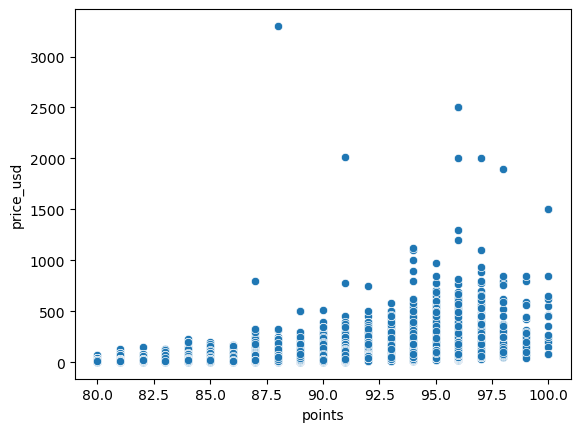

In [85]:
sns.scatterplot(data=wines_final, y="price_usd", x="points")
plt.show()

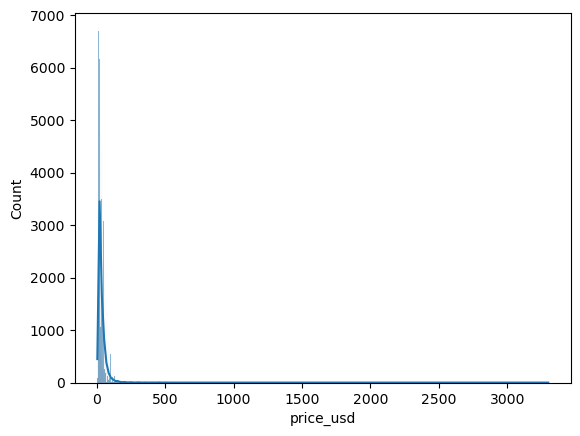

In [86]:
sns.histplot(data=wines_final, x="price_usd", kde=True)
plt.show()

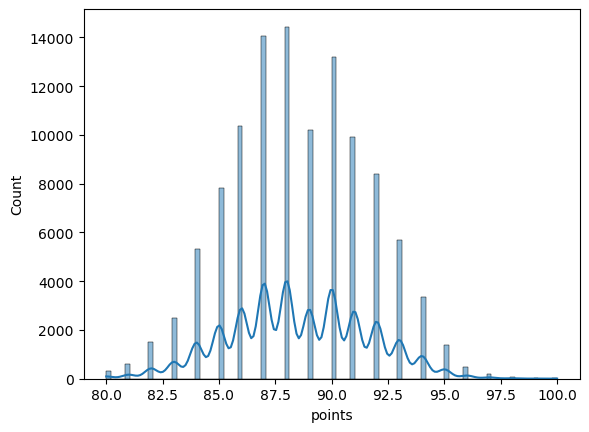

In [87]:
sns.histplot(data=wines_final, x="points", kde=True)
plt.show()